# Physics-informed neural networks for the Lorenz system

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from src.data import LorenzSystem
from src.visualisation import plot_param_process, plot_progress, plot_error

In [2]:
save_dir = '../figures/lorenz/pinn'

## Lorenz system
First of all define the number of data $N$, the end time $T$ (note that the time intervall is $[0,T]$) and the varianz $\sigma_z$ of the the centered normal distributed noise term $z \sim \mathcal{N}(0, \sigma_z)$.

In [3]:
number_of_data = 250
end_time = 3
noise = 0.5

Generate the true unnoised values of the Lorenz system and plot them in 2d and ...

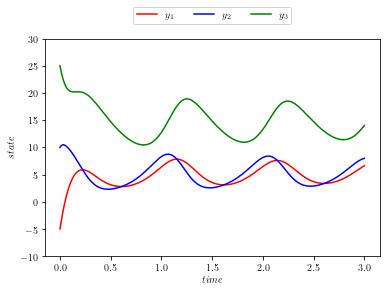

In [4]:
lorenz_true = LorenzSystem(number_of_data=number_of_data, end_time=end_time)
lorenz_true.set_data()
lorenz_true.plot_data()

In [5]:
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (16, 8),
                     'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{lmodern}', 
                     'font.weight': 'bold', 
                     "axes.labelweight": "bold"})

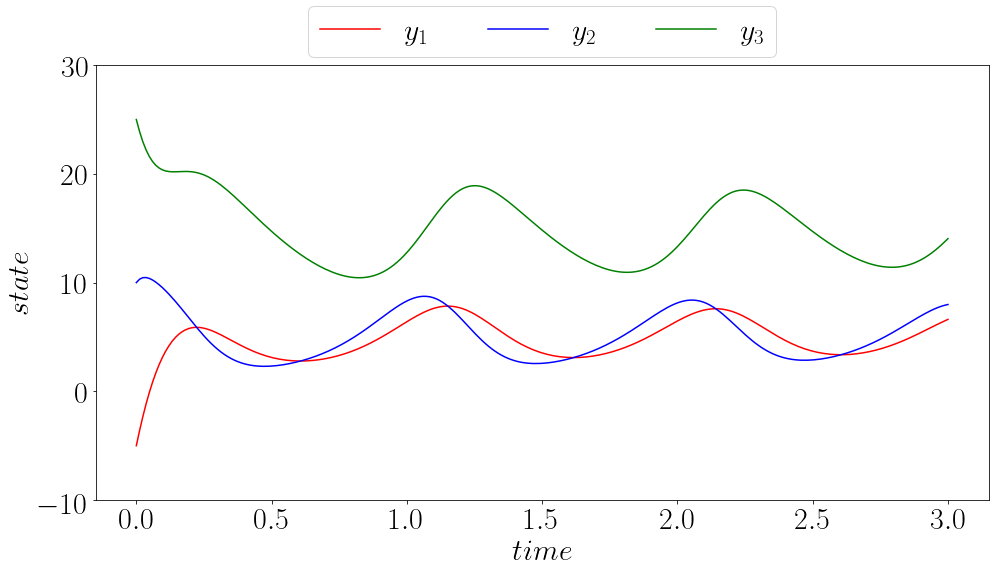

In [6]:
lorenz_true.plot_data(save_dir=save_dir)
lorenz_true.plot_data()

... in 3d.

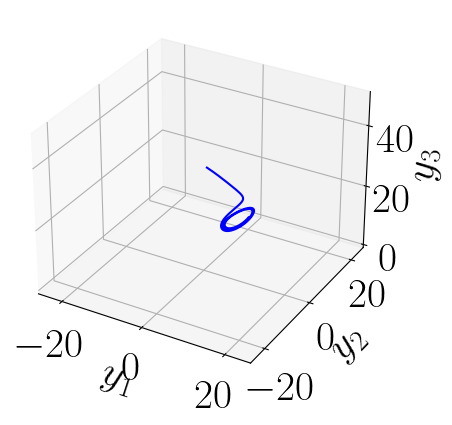

In [7]:
lorenz_true.plot_data(kind='3d')

Now the noisy data is also generated. The model is then trained on this data.

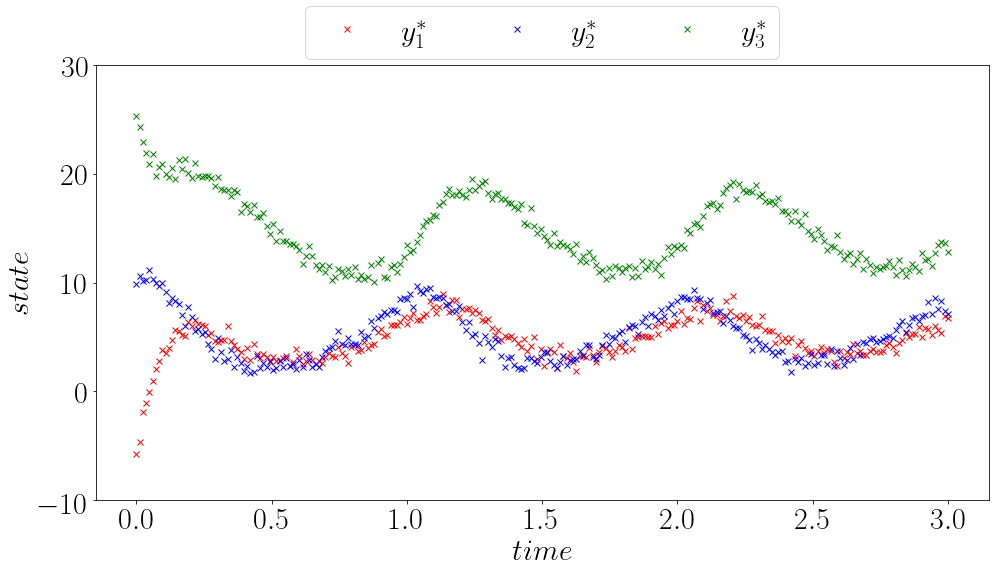

In [8]:
lorenz_noise = LorenzSystem(noise_variance=noise, number_of_data=number_of_data, end_time=end_time)
lorenz_noise.set_data()
lorenz_noise.plot_data(save_dir=save_dir)
lorenz_noise.plot_data()

The deviation between true and noisy values is shown in the next figure.

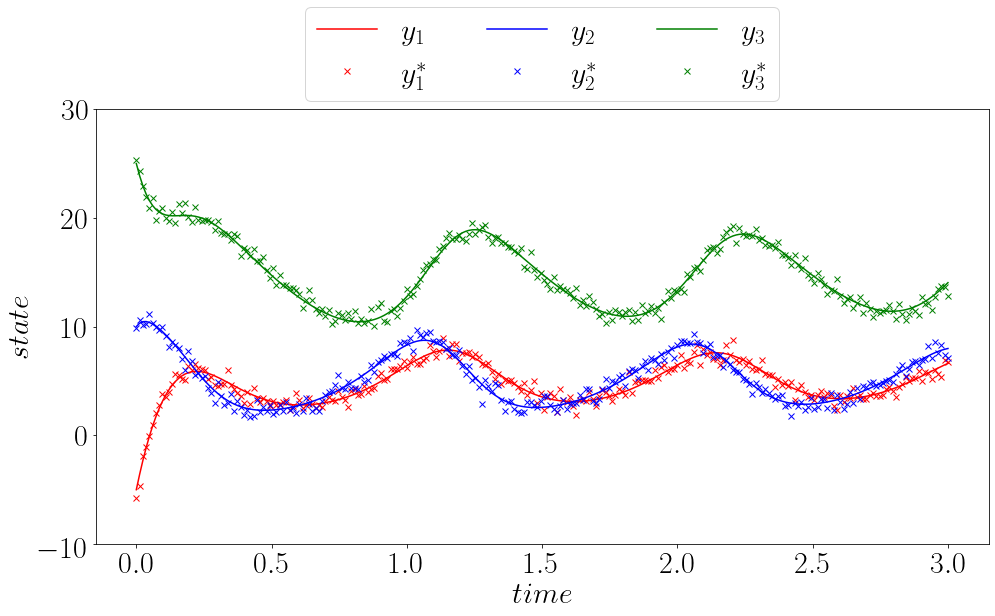

In [9]:
colors = ['r', 'b', 'g']
for i, col in enumerate(lorenz_true.data.columns):
    plt.plot(lorenz_true.data[col], colors[i])
    plt.plot(lorenz_noise.data[col], f"{colors[i]}x")
    plt.ylabel(r"$state$")
    plt.xlabel(r"$time$")
    legend = [r"$y_1$", r"$y^{\ast}_1$", r"$y_2$", r"$y^{\ast}_2$", r"$y_3$", r"$y^{\ast}_3$"]
    plt.legend(legend, ncol=3, loc='upper center',  bbox_to_anchor=(0.5, 1.27))
    plt.ylim(-10, 30)
plt.savefig(f"{save_dir}/lorenz_2d_noise_with_true", dpi=300, bbox_inches='tight')
plt.show()

## Physics-informed neural network
Since the data are already available, the physics-informed neural network can now be created.

In [10]:
from src.pinn import PhysicsInformedNeuralNet

Using backend: pytorch



In [11]:
pinn = PhysicsInformedNeuralNet(lorenz_noise)

Now it just needs to be trained.

In [12]:
loss_history = pinn.train(epochs=50000, display_every=100)

Compiling model...
'compile' took 0.000073 s

Training model...

Step      Train loss                                                                                    Test loss                                                                                     Test metric
0         [4.24e-03, 3.35e-03, 1.18e-02, 2.50e+01, 1.00e+02, 6.25e+02, 2.72e+01, 3.31e+01, 2.37e+02]    [4.24e-03, 3.35e-03, 1.18e-02, 2.50e+01, 1.00e+02, 6.25e+02, 2.72e+01, 3.31e+01, 2.37e+02]    []  
100       [6.71e-02, 1.84e-01, 1.44e+00, 2.06e+01, 4.78e+01, 2.14e+02, 2.89e+01, 9.07e+00, 2.56e+01]    [6.71e-02, 1.84e-01, 1.44e+00, 2.06e+01, 4.78e+01, 2.14e+02, 2.89e+01, 9.07e+00, 2.56e+01]    []  
200       [4.75e-04, 7.00e-02, 3.00e-01, 2.09e+01, 1.51e+01, 1.07e+02, 3.02e+01, 6.37e+00, 1.10e+01]    [4.75e-04, 7.00e-02, 3.00e-01, 2.09e+01, 1.51e+01, 1.07e+02, 3.02e+01, 6.37e+00, 1.10e+01]    []  
300       [1.03e-04, 1.82e-03, 6.05e-03, 2.08e+01, 7.76e+00, 6.50e+01, 3.04e+01, 9.55e+00, 1.54e+01]    [1.03e-04, 1

4000      [1.55e-08, 4.00e-04, 9.15e-07, 2.16e+01, 5.76e+00, 2.55e+01, 2.97e+01, 1.11e+01, 3.65e+01]    [1.55e-08, 4.00e-04, 9.15e-07, 2.16e+01, 5.76e+00, 2.55e+01, 2.97e+01, 1.11e+01, 3.65e+01]    []  
4100      [1.36e-08, 4.35e-04, 7.66e-07, 2.16e+01, 5.76e+00, 2.55e+01, 2.97e+01, 1.11e+01, 3.65e+01]    [1.36e-08, 4.35e-04, 7.66e-07, 2.16e+01, 5.76e+00, 2.55e+01, 2.97e+01, 1.11e+01, 3.65e+01]    []  
4200      [1.19e-08, 2.49e-04, 3.41e-06, 2.16e+01, 5.76e+00, 2.55e+01, 2.97e+01, 1.11e+01, 3.65e+01]    [1.19e-08, 2.49e-04, 3.41e-06, 2.16e+01, 5.76e+00, 2.55e+01, 2.97e+01, 1.11e+01, 3.65e+01]    []  
4300      [1.05e-08, 4.65e-04, 8.00e-07, 2.16e+01, 5.76e+00, 2.55e+01, 2.97e+01, 1.11e+01, 3.65e+01]    [1.05e-08, 4.65e-04, 8.00e-07, 2.16e+01, 5.76e+00, 2.55e+01, 2.97e+01, 1.11e+01, 3.65e+01]    []  
4400      [9.19e-09, 4.17e-04, 5.23e-07, 2.16e+01, 5.76e+00, 2.55e+01, 2.97e+01, 1.11e+01, 3.65e+01]    [9.19e-09, 4.17e-04, 5.23e-07, 2.16e+01, 5.76e+00, 2.55e+01, 2.97e+01, 1.11e+01, 3.6

8100      [7.63e-11, 1.63e-04, 1.02e-06, 2.19e+01, 5.75e+00, 2.55e+01, 2.93e+01, 1.11e+01, 3.65e+01]    [7.63e-11, 1.63e-04, 1.02e-06, 2.19e+01, 5.75e+00, 2.55e+01, 2.93e+01, 1.11e+01, 3.65e+01]    []  
8200      [5.09e-11, 2.50e-04, 8.51e-09, 2.19e+01, 5.75e+00, 2.55e+01, 2.93e+01, 1.11e+01, 3.65e+01]    [5.09e-11, 2.50e-04, 8.51e-09, 2.19e+01, 5.75e+00, 2.55e+01, 2.93e+01, 1.11e+01, 3.65e+01]    []  
8300      [3.71e-10, 2.46e-04, 9.39e-08, 2.19e+01, 5.74e+00, 2.55e+01, 2.93e+01, 1.11e+01, 3.64e+01]    [3.71e-10, 2.46e-04, 9.39e-08, 2.19e+01, 5.74e+00, 2.55e+01, 2.93e+01, 1.11e+01, 3.64e+01]    []  
8400      [3.52e-02, 8.81e-01, 2.02e+00, 2.17e+01, 1.15e-01, 1.23e+00, 2.78e+01, 7.62e+00, 1.25e+01]    [3.52e-02, 8.81e-01, 2.02e+00, 2.17e+01, 1.15e-01, 1.23e+00, 2.78e+01, 7.62e+00, 1.25e+01]    []  
8500      [1.17e-01, 1.24e+00, 1.83e+00, 2.04e+01, 1.01e-01, 9.34e-01, 2.76e+01, 7.89e+00, 1.19e+01]    [1.17e-01, 1.24e+00, 1.83e+00, 2.04e+01, 1.01e-01, 9.34e-01, 2.76e+01, 7.89e+00, 1.1

12200     [3.88e+00, 1.13e+00, 1.22e+00, 7.36e+00, 3.22e-01, 6.34e-01, 2.75e+01, 1.27e+01, 9.20e+00]    [3.88e+00, 1.13e+00, 1.22e+00, 7.36e+00, 3.22e-01, 6.34e-01, 2.75e+01, 1.27e+01, 9.20e+00]    []  
12300     [3.88e+00, 1.25e+00, 1.19e+00, 7.32e+00, 3.20e-01, 6.34e-01, 2.74e+01, 1.28e+01, 9.16e+00]    [3.88e+00, 1.25e+00, 1.19e+00, 7.32e+00, 3.20e-01, 6.34e-01, 2.74e+01, 1.28e+01, 9.16e+00]    []  
12400     [3.88e+00, 1.15e+00, 1.19e+00, 7.26e+00, 3.23e-01, 6.28e-01, 2.74e+01, 1.28e+01, 9.11e+00]    [3.88e+00, 1.15e+00, 1.19e+00, 7.26e+00, 3.23e-01, 6.28e-01, 2.74e+01, 1.28e+01, 9.11e+00]    []  
12500     [3.88e+00, 1.16e+00, 1.18e+00, 7.21e+00, 3.24e-01, 6.25e-01, 2.74e+01, 1.29e+01, 9.06e+00]    [3.88e+00, 1.16e+00, 1.18e+00, 7.21e+00, 3.24e-01, 6.25e-01, 2.74e+01, 1.29e+01, 9.06e+00]    []  
12600     [3.89e+00, 1.08e+00, 1.19e+00, 7.14e+00, 3.28e-01, 6.21e-01, 2.75e+01, 1.29e+01, 9.01e+00]    [3.89e+00, 1.08e+00, 1.19e+00, 7.14e+00, 3.28e-01, 6.21e-01, 2.75e+01, 1.29e+01, 9.0

16300     [3.40e+00, 1.63e+00, 7.28e-01, 5.14e+00, 3.43e-01, 4.88e-01, 2.72e+01, 1.53e+01, 7.15e+00]    [3.40e+00, 1.63e+00, 7.28e-01, 5.14e+00, 3.43e-01, 4.88e-01, 2.72e+01, 1.53e+01, 7.15e+00]    []  
16400     [3.38e+00, 1.64e+00, 7.14e-01, 5.08e+00, 3.43e-01, 4.83e-01, 2.72e+01, 1.54e+01, 7.11e+00]    [3.38e+00, 1.64e+00, 7.14e-01, 5.08e+00, 3.43e-01, 4.83e-01, 2.72e+01, 1.54e+01, 7.11e+00]    []  
16500     [3.35e+00, 1.64e+00, 6.98e-01, 5.03e+00, 3.40e-01, 4.79e-01, 2.72e+01, 1.54e+01, 7.06e+00]    [3.35e+00, 1.64e+00, 6.98e-01, 5.03e+00, 3.40e-01, 4.79e-01, 2.72e+01, 1.54e+01, 7.06e+00]    []  
16600     [3.33e+00, 1.68e+00, 6.86e-01, 4.97e+00, 3.42e-01, 4.71e-01, 2.72e+01, 1.55e+01, 7.02e+00]    [3.33e+00, 1.68e+00, 6.86e-01, 4.97e+00, 3.42e-01, 4.71e-01, 2.72e+01, 1.55e+01, 7.02e+00]    []  
16700     [3.31e+00, 1.70e+00, 6.72e-01, 4.91e+00, 3.41e-01, 4.65e-01, 2.72e+01, 1.56e+01, 6.98e+00]    [3.31e+00, 1.70e+00, 6.72e-01, 4.91e+00, 3.41e-01, 4.65e-01, 2.72e+01, 1.56e+01, 6.9

20400     [1.02e+00, 1.72e+00, 8.03e-01, 7.75e-01, 1.24e-01, 9.38e-03, 2.65e+00, 3.24e+00, 1.36e+01]    [1.02e+00, 1.72e+00, 8.03e-01, 7.75e-01, 1.24e-01, 9.38e-03, 2.65e+00, 3.24e+00, 1.36e+01]    []  
20500     [9.40e-01, 1.45e+00, 7.75e-01, 7.28e-01, 7.93e-02, 1.84e-02, 2.38e+00, 2.78e+00, 1.30e+01]    [9.40e-01, 1.45e+00, 7.75e-01, 7.28e-01, 7.93e-02, 1.84e-02, 2.38e+00, 2.78e+00, 1.30e+01]    []  
20600     [8.10e-01, 1.35e+00, 6.86e-01, 6.46e-01, 4.76e-02, 2.74e-02, 2.18e+00, 2.44e+00, 1.23e+01]    [8.10e-01, 1.35e+00, 6.86e-01, 6.46e-01, 4.76e-02, 2.74e-02, 2.18e+00, 2.44e+00, 1.23e+01]    []  
20700     [6.92e-01, 1.25e+00, 5.99e-01, 5.62e-01, 2.46e-02, 3.60e-02, 2.02e+00, 2.19e+00, 1.16e+01]    [6.92e-01, 1.25e+00, 5.99e-01, 5.62e-01, 2.46e-02, 3.60e-02, 2.02e+00, 2.19e+00, 1.16e+01]    []  
20800     [5.95e-01, 1.12e+00, 5.37e-01, 4.89e-01, 1.08e-02, 4.15e-02, 1.88e+00, 2.00e+00, 1.11e+01]    [5.95e-01, 1.12e+00, 5.37e-01, 4.89e-01, 1.08e-02, 4.15e-02, 1.88e+00, 2.00e+00, 1.1

24500     [3.85e-02, 7.23e-02, 6.87e-02, 8.33e-03, 1.71e-04, 7.35e-03, 3.99e-01, 3.86e-01, 1.14e+00]    [3.85e-02, 7.23e-02, 6.87e-02, 8.33e-03, 1.71e-04, 7.35e-03, 3.99e-01, 3.86e-01, 1.14e+00]    []  
24600     [3.61e-02, 7.34e-02, 6.33e-02, 9.32e-03, 2.39e-04, 4.87e-03, 3.87e-01, 3.77e-01, 1.05e+00]    [3.61e-02, 7.34e-02, 6.33e-02, 9.32e-03, 2.39e-04, 4.87e-03, 3.87e-01, 3.77e-01, 1.05e+00]    []  
24700     [3.40e-02, 6.63e-02, 6.07e-02, 8.52e-03, 2.29e-04, 4.48e-03, 3.76e-01, 3.68e-01, 9.69e-01]    [3.40e-02, 6.63e-02, 6.07e-02, 8.52e-03, 2.29e-04, 4.48e-03, 3.76e-01, 3.68e-01, 9.69e-01]    []  
24800     [3.63e-02, 5.05e-02, 5.94e-02, 9.78e-03, 2.06e-04, 2.84e-03, 3.64e-01, 3.59e-01, 9.05e-01]    [3.63e-02, 5.05e-02, 5.94e-02, 9.78e-03, 2.06e-04, 2.84e-03, 3.64e-01, 3.59e-01, 9.05e-01]    []  
24900     [3.11e-02, 5.45e-02, 5.58e-02, 7.05e-03, 1.77e-04, 3.83e-03, 3.56e-01, 3.51e-01, 8.27e-01]    [3.11e-02, 5.45e-02, 5.58e-02, 7.05e-03, 1.77e-04, 3.83e-03, 3.56e-01, 3.51e-01, 8.2

28600     [6.15e-03, 5.73e-03, 1.16e-02, 1.95e-05, 2.53e-05, 5.37e-06, 2.51e-01, 2.67e-01, 2.61e-01]    [6.15e-03, 5.73e-03, 1.16e-02, 1.95e-05, 2.53e-05, 5.37e-06, 2.51e-01, 2.67e-01, 2.61e-01]    []  
28700     [6.00e-03, 5.50e-03, 1.12e-02, 1.36e-05, 2.74e-05, 4.36e-06, 2.51e-01, 2.67e-01, 2.61e-01]    [6.00e-03, 5.50e-03, 1.12e-02, 1.36e-05, 2.74e-05, 4.36e-06, 2.51e-01, 2.67e-01, 2.61e-01]    []  
28800     [3.68e-02, 1.57e-01, 6.59e-02, 6.08e-04, 7.34e-05, 4.05e-04, 2.52e-01, 2.67e-01, 2.67e-01]    [3.68e-02, 1.57e-01, 6.59e-02, 6.08e-04, 7.34e-05, 4.05e-04, 2.52e-01, 2.67e-01, 2.67e-01]    []  
28900     [5.69e-03, 5.26e-03, 1.04e-02, 9.16e-06, 2.62e-05, 1.43e-06, 2.51e-01, 2.67e-01, 2.61e-01]    [5.69e-03, 5.26e-03, 1.04e-02, 9.16e-06, 2.62e-05, 1.43e-06, 2.51e-01, 2.67e-01, 2.61e-01]    []  
29000     [5.51e-03, 5.14e-03, 1.01e-02, 5.47e-06, 2.58e-05, 1.32e-06, 2.51e-01, 2.67e-01, 2.61e-01]    [5.51e-03, 5.14e-03, 1.01e-02, 5.47e-06, 2.58e-05, 1.32e-06, 2.51e-01, 2.67e-01, 2.6

32700     [3.04e-03, 3.41e-03, 4.37e-03, 3.37e-07, 5.25e-06, 4.32e-06, 2.51e-01, 2.66e-01, 2.61e-01]    [3.04e-03, 3.41e-03, 4.37e-03, 3.37e-07, 5.25e-06, 4.32e-06, 2.51e-01, 2.66e-01, 2.61e-01]    []  
32800     [2.77e-03, 3.24e-03, 4.15e-03, 1.82e-06, 6.48e-06, 2.96e-07, 2.51e-01, 2.66e-01, 2.61e-01]    [2.77e-03, 3.24e-03, 4.15e-03, 1.82e-06, 6.48e-06, 2.96e-07, 2.51e-01, 2.66e-01, 2.61e-01]    []  
32900     [2.72e-03, 3.39e-03, 4.07e-03, 1.93e-06, 7.35e-06, 3.10e-07, 2.50e-01, 2.66e-01, 2.61e-01]    [2.72e-03, 3.39e-03, 4.07e-03, 1.93e-06, 7.35e-06, 3.10e-07, 2.50e-01, 2.66e-01, 2.61e-01]    []  
33000     [2.89e-03, 3.30e-03, 4.22e-03, 4.89e-06, 7.34e-06, 6.17e-08, 2.51e-01, 2.66e-01, 2.61e-01]    [2.89e-03, 3.30e-03, 4.22e-03, 4.89e-06, 7.34e-06, 6.17e-08, 2.51e-01, 2.66e-01, 2.61e-01]    []  
33100     [3.23e-03, 8.63e-03, 5.48e-03, 6.83e-06, 4.25e-06, 2.00e-05, 2.50e-01, 2.66e-01, 2.61e-01]    [3.23e-03, 8.63e-03, 5.48e-03, 6.83e-06, 4.25e-06, 2.00e-05, 2.50e-01, 2.66e-01, 2.6

36800     [8.39e-03, 1.70e-02, 6.58e-03, 4.56e-07, 5.98e-06, 6.25e-07, 2.51e-01, 2.65e-01, 2.62e-01]    [8.39e-03, 1.70e-02, 6.58e-03, 4.56e-07, 5.98e-06, 6.25e-07, 2.51e-01, 2.65e-01, 2.62e-01]    []  
36900     [2.14e-03, 2.68e-03, 2.89e-03, 1.13e-05, 4.00e-06, 8.90e-07, 2.51e-01, 2.66e-01, 2.61e-01]    [2.14e-03, 2.68e-03, 2.89e-03, 1.13e-05, 4.00e-06, 8.90e-07, 2.51e-01, 2.66e-01, 2.61e-01]    []  
37000     [2.21e-03, 2.85e-03, 2.97e-03, 1.07e-05, 3.77e-06, 6.55e-07, 2.51e-01, 2.66e-01, 2.62e-01]    [2.21e-03, 2.85e-03, 2.97e-03, 1.07e-05, 3.77e-06, 6.55e-07, 2.51e-01, 2.66e-01, 2.62e-01]    []  
37100     [2.03e-03, 3.44e-03, 2.92e-03, 1.23e-07, 3.14e-06, 6.89e-06, 2.50e-01, 2.66e-01, 2.61e-01]    [2.03e-03, 3.44e-03, 2.92e-03, 1.23e-07, 3.14e-06, 6.89e-06, 2.50e-01, 2.66e-01, 2.61e-01]    []  
37200     [3.75e-03, 5.78e-03, 5.08e-03, 1.18e-04, 4.38e-06, 8.26e-05, 2.51e-01, 2.66e-01, 2.62e-01]    [3.75e-03, 5.78e-03, 5.08e-03, 1.18e-04, 4.38e-06, 8.26e-05, 2.51e-01, 2.66e-01, 2.6

40900     [1.74e-03, 2.39e-03, 2.25e-03, 7.51e-08, 2.22e-06, 5.48e-06, 2.51e-01, 2.66e-01, 2.61e-01]    [1.74e-03, 2.39e-03, 2.25e-03, 7.51e-08, 2.22e-06, 5.48e-06, 2.51e-01, 2.66e-01, 2.61e-01]    []  
41000     [5.34e-03, 1.01e-02, 4.45e-03, 9.60e-08, 5.76e-06, 5.96e-06, 2.51e-01, 2.66e-01, 2.62e-01]    [5.34e-03, 1.01e-02, 4.45e-03, 9.60e-08, 5.76e-06, 5.96e-06, 2.51e-01, 2.66e-01, 2.62e-01]    []  
41100     [1.67e-03, 2.39e-03, 2.20e-03, 5.24e-06, 1.90e-06, 1.87e-07, 2.51e-01, 2.66e-01, 2.61e-01]    [1.67e-03, 2.39e-03, 2.20e-03, 5.24e-06, 1.90e-06, 1.87e-07, 2.51e-01, 2.66e-01, 2.61e-01]    []  
41200     [1.76e-03, 2.36e-03, 2.25e-03, 1.96e-07, 1.95e-06, 4.49e-06, 2.51e-01, 2.66e-01, 2.61e-01]    [1.76e-03, 2.36e-03, 2.25e-03, 1.96e-07, 1.95e-06, 4.49e-06, 2.51e-01, 2.66e-01, 2.61e-01]    []  
41300     [1.65e-03, 2.40e-03, 2.17e-03, 5.23e-06, 1.91e-06, 2.16e-07, 2.51e-01, 2.66e-01, 2.61e-01]    [1.65e-03, 2.40e-03, 2.17e-03, 5.23e-06, 1.91e-06, 2.16e-07, 2.51e-01, 2.66e-01, 2.6

45000     [1.48e-03, 3.04e-03, 2.07e-03, 5.71e-07, 1.13e-06, 4.34e-06, 2.50e-01, 2.66e-01, 2.61e-01]    [1.48e-03, 3.04e-03, 2.07e-03, 5.71e-07, 1.13e-06, 4.34e-06, 2.50e-01, 2.66e-01, 2.61e-01]    []  
45100     [1.45e-03, 2.31e-03, 1.89e-03, 4.69e-06, 1.33e-06, 4.98e-07, 2.51e-01, 2.66e-01, 2.61e-01]    [1.45e-03, 2.31e-03, 1.89e-03, 4.69e-06, 1.33e-06, 4.98e-07, 2.51e-01, 2.66e-01, 2.61e-01]    []  
45200     [1.20e-02, 5.00e-02, 1.91e-02, 8.48e-05, 3.72e-07, 4.71e-05, 2.51e-01, 2.66e-01, 2.64e-01]    [1.20e-02, 5.00e-02, 1.91e-02, 8.48e-05, 3.72e-07, 4.71e-05, 2.51e-01, 2.66e-01, 2.64e-01]    []  
45300     [1.49e-03, 2.17e-03, 1.89e-03, 5.61e-06, 1.44e-06, 2.50e-07, 2.51e-01, 2.66e-01, 2.61e-01]    [1.49e-03, 2.17e-03, 1.89e-03, 5.61e-06, 1.44e-06, 2.50e-07, 2.51e-01, 2.66e-01, 2.61e-01]    []  
45400     [1.50e-03, 2.20e-03, 1.91e-03, 5.63e-06, 9.86e-07, 2.01e-07, 2.51e-01, 2.66e-01, 2.61e-01]    [1.50e-03, 2.20e-03, 1.91e-03, 5.63e-06, 9.86e-07, 2.01e-07, 2.51e-01, 2.66e-01, 2.6

49100     [1.32e-03, 2.14e-03, 1.69e-03, 4.76e-06, 9.28e-07, 5.77e-07, 2.51e-01, 2.66e-01, 2.61e-01]    [1.32e-03, 2.14e-03, 1.69e-03, 4.76e-06, 9.28e-07, 5.77e-07, 2.51e-01, 2.66e-01, 2.61e-01]    []  
49200     [1.38e-03, 2.04e-03, 1.70e-03, 1.56e-06, 1.28e-06, 2.78e-06, 2.51e-01, 2.66e-01, 2.61e-01]    [1.38e-03, 2.04e-03, 1.70e-03, 1.56e-06, 1.28e-06, 2.78e-06, 2.51e-01, 2.66e-01, 2.61e-01]    []  
49300     [1.32e-03, 2.09e-03, 1.67e-03, 5.88e-06, 1.15e-06, 3.14e-07, 2.51e-01, 2.66e-01, 2.61e-01]    [1.32e-03, 2.09e-03, 1.67e-03, 5.88e-06, 1.15e-06, 3.14e-07, 2.51e-01, 2.66e-01, 2.61e-01]    []  
49400     [1.76e-03, 3.15e-03, 2.00e-03, 9.32e-05, 3.89e-06, 4.80e-05, 2.51e-01, 2.66e-01, 2.61e-01]    [1.76e-03, 3.15e-03, 2.00e-03, 9.32e-05, 3.89e-06, 4.80e-05, 2.51e-01, 2.66e-01, 2.61e-01]    []  
49500     [1.32e-03, 2.08e-03, 1.67e-03, 5.85e-06, 1.16e-06, 3.16e-07, 2.51e-01, 2.66e-01, 2.61e-01]    [1.32e-03, 2.08e-03, 1.67e-03, 5.85e-06, 1.16e-06, 3.16e-07, 2.51e-01, 2.66e-01, 2.6

Subsequently, the learning process can be visualised by plotting the development of the loss function per Epoch.

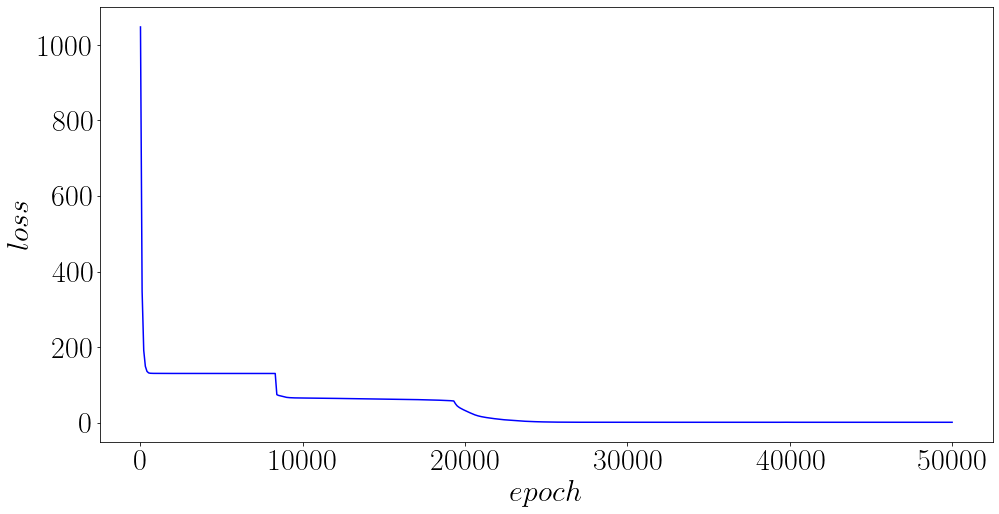

In [13]:
plt.plot(loss_history.steps, sum(numpy.array(loss_history.loss_train).T), 'b-')
plt.ylabel(r'$loss$')
plt.xlabel(r'$epoch$')
plt.savefig(f"{save_dir}/lorenz_pinn_loss", dpi=300)
plt.show()

After that, we look at how well the states were predicted. As an aid, the predictions can be presented together with the observations and the underlying true values.

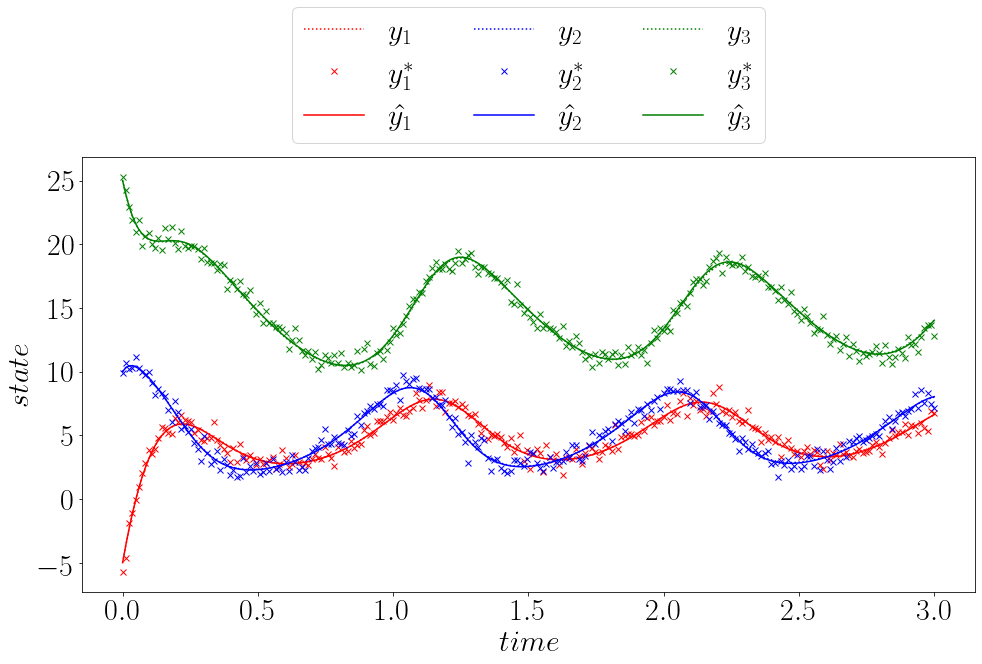

save figure to ../figures/lorenz/pinn/lorenz_pinn_progress


In [14]:
plot_progress(time=pinn.input_data['t'],
              observation=pinn.differential_equation.data,
              true=lorenz_true.data,
              prediction=pinn.predict(pinn.input_data['t']))
plot_progress(time=pinn.input_data['t'],
              observation=pinn.differential_equation.data,
              true=lorenz_true.data,
              prediction=pinn.predict(pinn.input_data['t']), 
              save_path=f"{save_dir}/lorenz_pinn_progress")

Finally, we check how well the parameter estimation worked by plotting the development of the parameters over the epochs.
For comparison, the parameters with which the data were generated are also plotted.

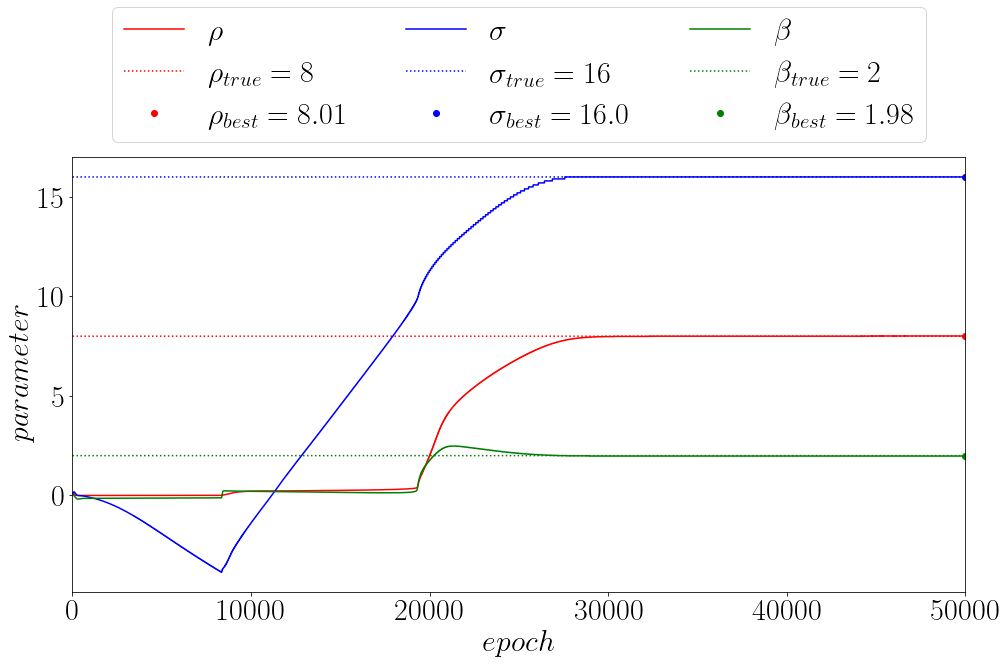

save figure to ../figures/lorenz/pinn/lorenz_pinn_param


In [15]:
plot_param_process(true_params=pinn.differential_equation.param, 
                   df_progress=pinn.get_param_history())
plot_param_process(true_params=pinn.differential_equation.param, 
                   df_progress=pinn.get_param_history(), 
                   save_path=f"{save_dir}/lorenz_pinn_param")

The cost per state is: 0.034484326696573975.


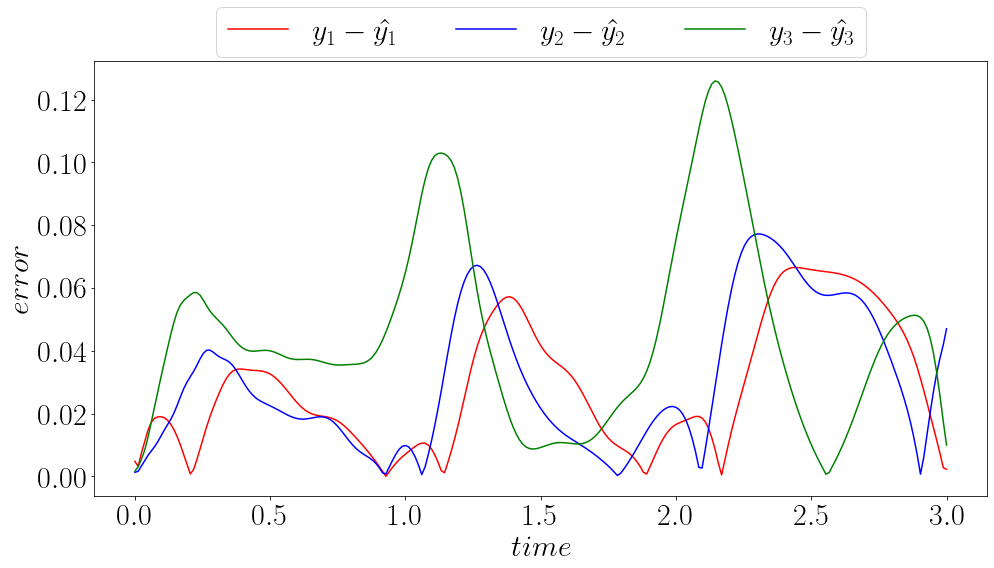

The cost per state is: 0.034484326696573975.
save figure to ../figures/lorenz/pinn/lorenz_pinn_error


In [16]:
plot_error(lorenz_true.data, pinn.predict(pinn.input_data['t']), name='pinn')
plot_error(lorenz_true.data, pinn.predict(pinn.input_data['t']), name='pinn', 
           save_path=f"{save_dir}/lorenz_pinn_error")